In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## **Import Dataset**

In [4]:
# Load data from CSV file
data = pd.read_csv("advertising.csv")

In [5]:
# Dataset First Look
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# **Data Exploration**

In [6]:
# Dataset Rows & Columns count
print("rows and columns",data.shape)

rows and columns (1000, 10)


In [7]:
 #Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
# Dataset Duplicate Value Count
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [9]:
# Dataset Columns
data.columns.values

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'], dtype=object)

In [10]:
# Select relevant features and target variable
features = ['Male', 'Country', 'Age']  # Modify as per your dataset
target = 'Clicked on Ad'

## **TRAINING**

In [11]:
# Prepare data
X = data[features]
y = data[target]

In [12]:
# Manually encode categorical variable 'Country'
country_mapping = {}
index = 0
for country in X['Country'].unique():
    country_mapping[country] = index
    index += 1

X['Country'] = X['Country'].map(country_mapping)

C:\Users\aadit\AppData\Local\Temp\ipykernel_10144\1854855708.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Country'] = X['Country'].map(country_mapping)


In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        89
           1       0.85      0.67      0.75       111

    accuracy                           0.75       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.77      0.75      0.75       200



In [16]:
# Function to make predictions
def predict_ad_click(male, country, age):
    country_encoded = country_mapping.get(country, -1)
    if country_encoded == -1:
        print("Country not found in training data.")
        return None
    input_data = [[male, country_encoded, age]]
    prediction = model.predict_proba(input_data)
    return prediction[0][1]*100  # Return probability of clicking on the ad


In [17]:
def predict_ad_click_country():
    country = input("Enter Country: ")
    predicted_probability = predict_ad_click(1, country, 30)  # Example age is set to 30
    if predicted_probability is not None:
        print("Predicted probability of clicking on the ad:", predicted_probability,"%")

def predict_ad_click_age():
    age = int(input("Enter Age: "))
    predicted_probability = predict_ad_click(1, "India", age)  # Example country is set to 'USA'
    if predicted_probability is not None:
        print("Predicted probability of clicking on the ad:", predicted_probability,"%")

def predict_ad_click_gender():
    gender = int(input("Enter 1 for Male or 0 for Female: "))
    predicted_probability = predict_ad_click(gender, "India", 30)  # Example country is set to 'USA', age is set to 30
    if predicted_probability is not None:
        print("Predicted probability of clicking on the ad:", predicted_probability,"%")

def predict_ad_click_all():
    gender = int(input("Enter 1 for Male or 0 for Female: "))
    country = input("Enter Country: ")
    age = int(input("Enter Age: "))
    predicted_probability = predict_ad_click(gender, country, age)
    if predicted_probability is not None:
        print("Predicted probability of clicking on the ad:", predicted_probability,"%")


In [18]:
# Example usage
while True:
    print("**********WELCOME TO AD CLICK PREDICTION************")
    print("1. Predict ad click based on country")
    print("2. Predict ad click based on age")
    print("3. Predict ad click based on gender")
    print("4. Compare all parameters (country, age, gender)")
    print("5. Exit")

    choice = input("Enter your choice: ")

    if choice == '1':
        predict_ad_click_country()
    elif choice == '2':
        predict_ad_click_age()
    elif choice == '3':
        predict_ad_click_gender()
    elif choice == '4':
        predict_ad_click_all()
    elif choice == '5':
        print("Exiting program...")
        break
    else:
        print("Invalid choice. Please enter a valid option.")


**********WELCOME TO AD CLICK PREDICTION************
1. Predict ad click based on country
2. Predict ad click based on age
3. Predict ad click based on gender
4. Compare all parameters (country, age, gender)
5. Exit


c:\Users\aadit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Predicted probability of clicking on the ad: 27.66700572143752 %
**********WELCOME TO AD CLICK PREDICTION************
1. Predict ad click based on country
2. Predict ad click based on age
3. Predict ad click based on gender
4. Compare all parameters (country, age, gender)
5. Exit
Invalid choice. Please enter a valid option.
**********WELCOME TO AD CLICK PREDICTION************
1. Predict ad click based on country
2. Predict ad click based on age
3. Predict ad click based on gender
4. Compare all parameters (country, age, gender)
5. Exit
Exiting program...


## **Data Visualisation**

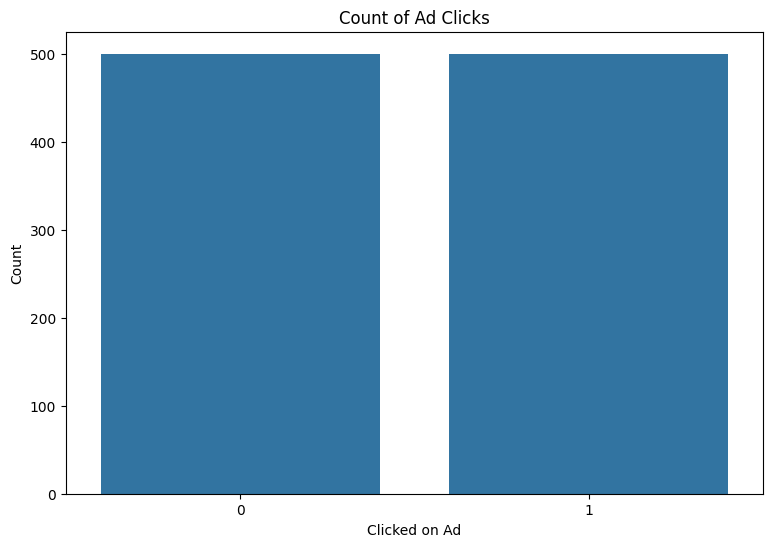

In [20]:
# Bar graph (count plot) for categorical variable

plt.figure(figsize=(9, 6))
sns.countplot(x="Clicked on Ad", data=data)
plt.title("Count of Ad Clicks")
plt.xlabel("Clicked on Ad")
plt.ylabel("Count")
plt.show()

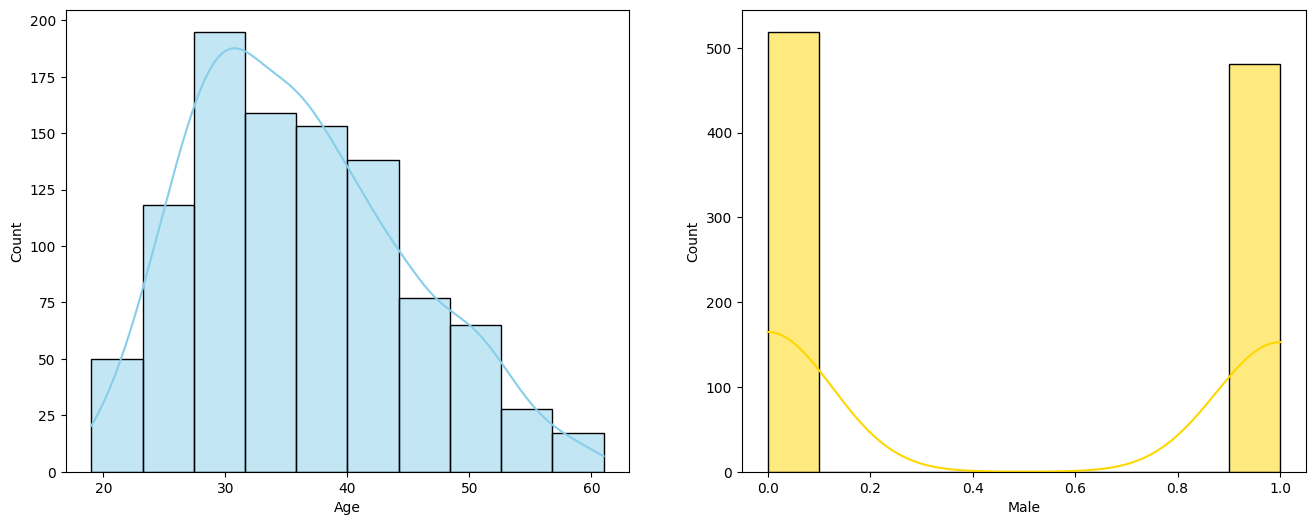

In [38]:
# Histogram and Density Graphs of all Variables were accessed.

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data.Age, bins=10, kde=True, color='skyblue', ax=ax[0])

sns.histplot(data.Male, bins=10, kde=True, color='gold', ax=ax[1])

plt.show()

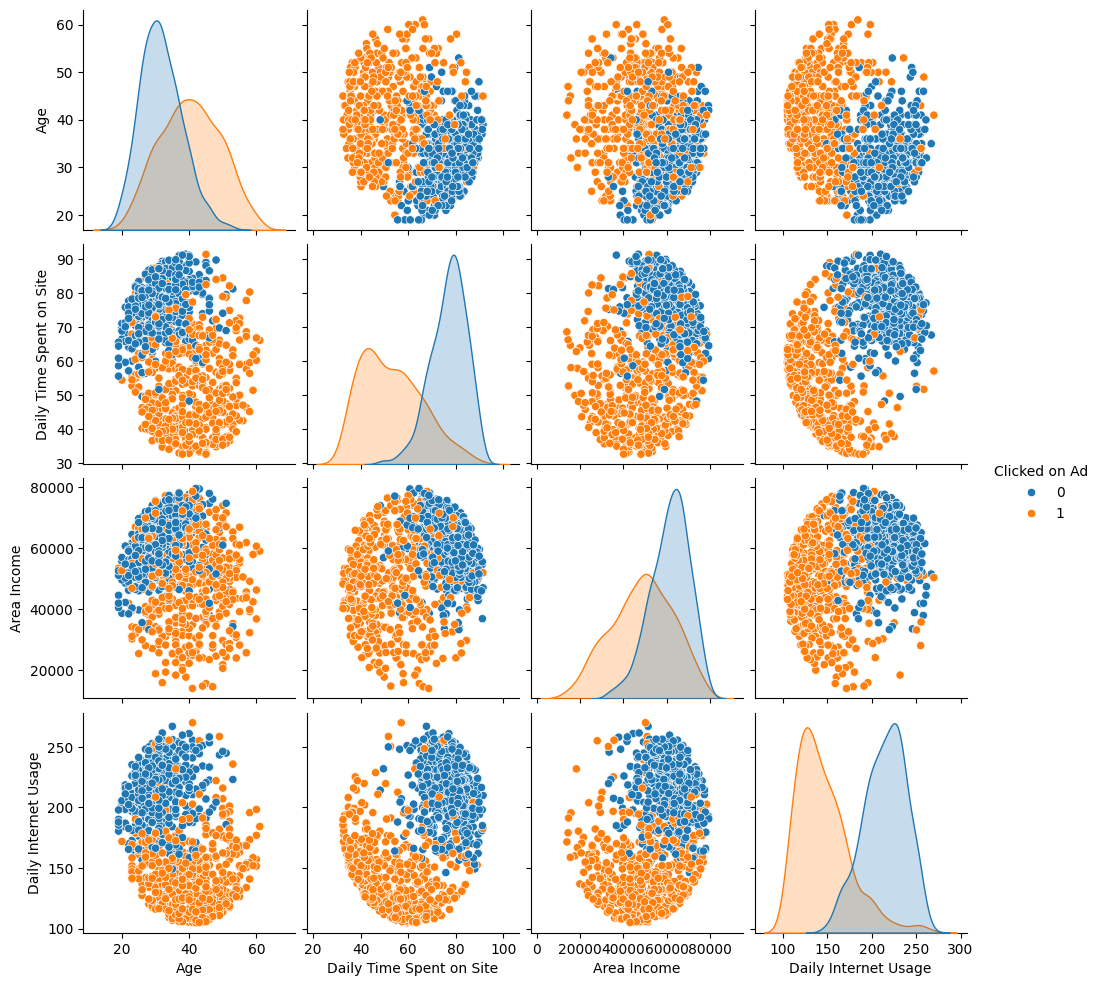

In [39]:
# Pair plot for numerical variables
sns.pairplot(data[['Age', 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']],
             hue='Clicked on Ad', diag_kind='kde')
plt.show()

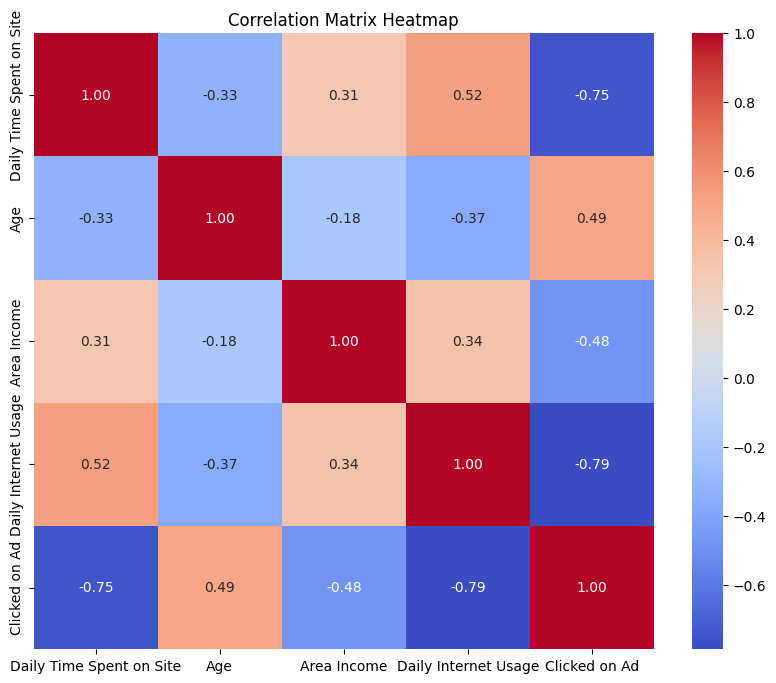

In [40]:
# Selecting numerical features and the target variable
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
target_variable = 'Clicked on Ad'

# Calculate the correlation matrix
correlation_matrix = data[numerical_features + [target_variable]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()